# ***PREMIER LEAGUE***

![](https://download.logo.wine/logo/Premier_League/Premier_League-Logo.wine.png)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
stats = pd.read_csv('../input/premier-league/stats.csv')
stats

In [ ]:
results = pd.read_csv('../input/premier-league/results.csv')
results

In [ ]:
results.season.unique()

# ANALYZING SEASON 2014-2015

In [ ]:
res = results[results.season == '2014-2015']
stat = stats[stats.season == '2014-2015']

In [ ]:
res

In [ ]:
stat

# *Columns*

In [ ]:
stat.columns

In [ ]:
stat['draws'] = 38-(stat.wins + stats.losses)
# stat

In [ ]:
label = stat.team.tolist()
x = np.arange(len(label))

# *Wins,Draws,Loss Distribution of Teams*

In [ ]:
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(x,stat.wins, '-o', color='green', label='Wins')
ax.plot(x,stat.losses,'-o', color='red', label='Losses')
ax.plot(x,stat.draws,'-o', color='blue', label='Draws')
ax.set_xticks(x)
ax.set_xticklabels(label)
plt.xticks(rotation=90)
ax.set_title('Premier League Season 2014-2015')
ax.legend()
plt.grid(axis='y')
plt.show()

# *WINNERS CHELSEA* 

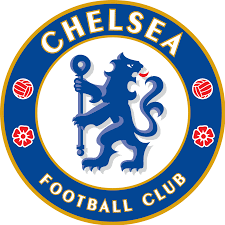

In [ ]:
che = stat[stat.team =='Chelsea']

# **Percentage Distribution of Results**

In [ ]:
pie_label = ['Wins', 'Draws', 'Losses']
data = [che.wins.values[0],che.draws.values[0],che.losses.values[0]]
plt.pie(data, labels = pie_label,autopct='%1.1f%%', shadow=True, startangle=60, radius=2)
plt.show()

In [ ]:
res_che = res[(res.home_team == 'Chelsea')|(res.away_team=='Chelsea')]

# *MATCHWEEK WISE ANALYSIS - CHELSEA*

In [ ]:
x_ = np.arange(len(res_che))

In [ ]:
goals, conceded = [], []
for i,row in res_che.iterrows():
    if row.home_team == 'Chelsea':
        goals.append(row.home_goals)
        conceded.append(row.away_goals)
    else:
        goals.append(row.away_goals)
        conceded.append(row.home_goals)

In [ ]:
f,a = plt.subplots(2,1,figsize=(12,7))
a[0].plot(x_,goals,'-o',color='blue', label='Scored')
a[0].set_xticks(x_)
a[0].set_ylabel('Goals Scored')
a[0].legend()
a[0].set_title('Matchweek Analysis')
a[1].plot(x_,conceded,'-o',color='green',label='Conceded')
a[1].set_xticks(x_)
a[1].set_ylabel('Goals Conceded')
a[1].set_xlabel('Matchweek')
a[1].legend()

plt.show()

# *TOP 6 ANALYSIS*

1. CHELSEA
2. MANCHESTER CITY
3. ARSENAL
4. MANCHESTER UNITED
5. TOTTENHAM HOTSPUR
6. LIVERPOOL

In [ ]:
top6 = stat[:6]

# ATTACKING PROWESS

In [ ]:
xlabel = top6.team.tolist()
sidex = np.arange(len(xlabel))

In [ ]:
figure, axis = plt.subplots(figsize=(12,7))
axis.bar(sidex+0.35/2, top6.total_scoring_att,0.35, color='orange',label='Scoring Chances')
axis.bar(sidex-0.35/2, top6.ontarget_scoring_att, 0.35, color='grey',label='On Target')
axis.plot(sidex, top6.total_cross,'-o', color='green',label='Crosses')
axis.plot(sidex, top6.corner_taken,'-o', color='red',label='Corners')
axis.plot(sidex, top6.total_through_ball,'-o', color='blue',label='Through Balls')
axis.set_xticks(sidex)
axis.set_xticklabels(xlabel)
axis.legend()
axis.set_title('Origin of Chances Created (Excluding Long Balls)')
plt.show()

In [ ]:
p,q = plt.subplots(figsize=(12,7))
q.plot(sidex, top6.att_freekick_goal,'-o', color='green',label='Free-Kicks')
q.plot(sidex, top6.att_pen_goal,'-o', color='orange',label='Penalties')
q.plot(sidex, top6.att_obox_goal,'-o', color='red',label='Outside the box')
q.plot(sidex, top6.goal_fastbreak,'-o', color='grey',label='Counter Attack')
q.set_xticks(sidex)
q.set_xticklabels(xlabel)
q.legend()
q.set_title('Distribution of Goals Scored (Exculding Inside the box)')
plt.grid()
plt.show()


# **DEFENSIVE ANALYSIS**

In [ ]:
names = ['Total Clearance','Interception','Dispossessed','Total Tackles']
listed = top6.team.tolist()
fig = plt.figure(figsize=(12,7))
for teams,num in zip(listed, range(1,7)):
    temp = top6[top6.team == teams]
    size=[temp.total_clearance.values[0],temp.interception.values[0],
          temp.dispossessed.values[0], temp.total_tackle.values[0]]
    plt.subplot(2,3,num)
    m = plt.Circle((0,0),0.8,color='White')
    plt.pie(size, colors=['red','green','orange','skyblue'])
    p=plt.gcf()
    p.gca().add_artist(m)
    plt.title(teams)
plt.figlegend(names, loc='center right')
plt.show()